Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

Logistic Regression <br>
SVM <br>
Decision Tree <br>
Random Forest <br>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import numpy as np
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
np.mean(lr)

0.9733333333333334

In [5]:
svm = cross_val_score(SVC(), X, Y, cv=5)
np.mean(svm)

0.9666666666666666

In [6]:
dtc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
np.mean(dtc)

0.9666666666666668

In [7]:
rfc = cross_val_score(RandomForestClassifier(n_estimators=40), X, Y, cv=5)
np.mean(rfc)

0.9666666666666668

Best model for the data is Logistic Regression

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.<br>
Figure out if any preprocessing such as scaling would help here <br>
Draw elbow plot and from that figure out optimal value of k <br>

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df1 = df1.drop(["sepal length (cm)","sepal width (cm)"], axis=1)
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [12]:
scaler = MinMaxScaler()
df1[["petal length (cm)"]] = scaler.fit_transform(df1[["petal length (cm)"]])
df1[["petal width (cm)"]] = scaler.fit_transform(df1[["petal width (cm)"]])
df1

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [13]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df1[["petal length (cm)"]], df1[["petal width (cm)"]])
    sse.append(km.inertia_)
sse

[13.338850904912379,
 1.9420778923288344,
 0.7042927675936682,
 0.36131890580612214,
 0.24979074045707844,
 0.16963218600931695,
 0.12192083068998748,
 0.09928702056327648,
 0.07548406978886721,
 0.06577050394419212]

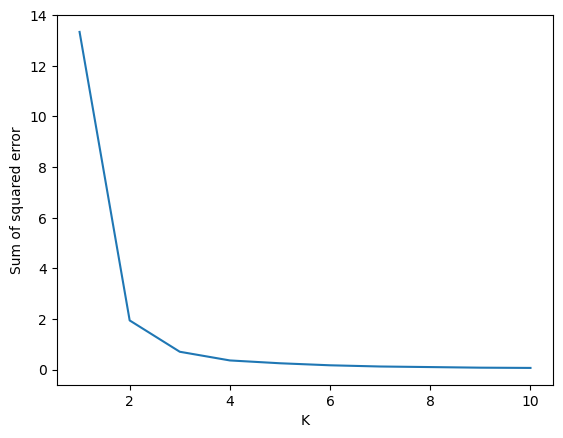

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

Here, the elbow is 3.

In [15]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df1[["petal length (cm)"]], df1[["petal width (cm)"]])
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [16]:
df1["cluster"] = yp
df1

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,0
147,0.711864,0.791667,2
148,0.745763,0.916667,2


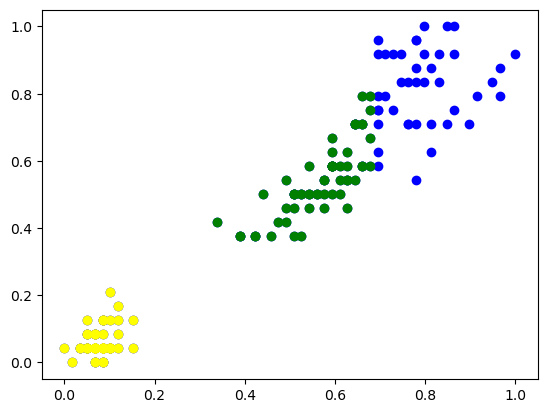

In [17]:
df2 = df1[df1["cluster"]==0]
df3 = df1[df1["cluster"]==1]
df4 = df1[df1["cluster"]==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [18]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [19]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [23]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [30]:
df.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [31]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target)

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9777777777777777

In [36]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.8666666666666667

GaussianNB is better for this data.

For digits dataset in sklearn.dataset, please try following classifiers and find out the one that gives best performance. Also find the optimal parameters for that classifier.

from sklearn import svm <br>
from sklearn.ensemble import RandomForestClassifier <br>
from sklearn.linear_model import LogisticRegression <br>
from sklearn.naive_bayes import GaussianNB <br>
from sklearn.naive_bayes import MultinomialNB <br>
from sklearn.tree import DecisionTreeClassifier

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


In [4]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
for key,value in model_params.items():
    clf = GridSearchCV(value["model"], value["params"], cv=5)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.917659,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.804700,{'criterion': 'entropy'}


So, the best model for this data is svm with params 'C': 1, 'kernel': 'linear'

From sklearn.datasets load digits dataset and do following

Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
Plot confusion matrix
Plot classification report

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target
X_test, X_train, y_test, y_train = train_test_split(X, y)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[3,4,5,6,7]} ,cv=10)
clf.fit(X, y)
clf.best_params_, clf.best_score_

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

({'n_neighbors': 3}, 0.9766325263811299)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9725315515961396

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

/Users/utsavacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[138,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 128,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   1, 137,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 134,   0,   0,   0,   2,   1,   0],
       [  0,   0,   0,   0, 135,   0,   0,   3,   0,   0],
       [  0,   0,   0,   1,   0, 135,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 135,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 129,   0,   0],
       [  1,  10,   0,   2,   0,   0,   1,   0, 116,   1],
       [  0,   1,   0,   5,   0,   3,   0,   0,   1, 123]])

Text(58.222222222222214, 0.5, 'Truth')

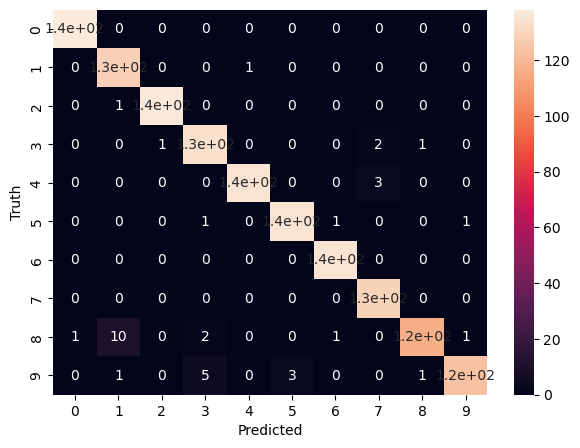

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       0.91      0.99      0.95       129
           2       0.99      0.99      0.99       138
           3       0.94      0.97      0.96       138
           4       0.99      0.98      0.99       138
           5       0.98      0.98      0.98       138
           6       0.99      1.00      0.99       135
           7       0.96      1.00      0.98       129
           8       0.98      0.89      0.93       131
           9       0.98      0.92      0.95       133

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347



<ol>
  <li>Load heart disease dataset in pandas dataframe</li>
  <li>Remove outliers using Z score. Usual guideline is to remove anything that has Z score &gt; 3 formula or Z score &lt; -3</li>
  <li>Convert text columns to numbers using label encoding and one hot encoding</li>
  <li>Apply scaling</li>
  <li>Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy</li>
  <li>Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life</li>
</ol>

In [18]:
import pandas as pd
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
df.shape

(918, 12)

In [21]:
def outline_remover(column):
    global df
    mean = df[column].mean()
    std = df[column].std()
    df["Z_score"]=(df[column]-mean)/std
    df = df[df["Z_score"].between(-3, 3)]

In [22]:
outline_remover("RestingBP")
outline_remover("Cholesterol")
outline_remover("MaxHR")
outline_remover("Oldpeak")

/var/folders/hg/n24r9jj93w7fwkd71c03mj9h0000gn/T/ipykernel_985/1591494925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Z_score"]=(df[column]-mean)/std


In [23]:
df.shape

(899, 13)

In [24]:
df = pd.get_dummies(df,drop_first=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Z_score,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,-0.830801,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0.108320,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,-0.830801,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0.577881,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,-0.830801,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.296145,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,2.362211,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0.296145,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,-0.830801,0,1,0,0,0,0,0,1,0


In [29]:
X = df.drop("HeartDisease", axis="columns")
y = df["HeartDisease"]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8933333333333333

In [34]:
from sklearn.decomposition import PCA
model_pca = PCA(0.95)
X = model_pca.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8755555555555555

In the previous dataset, do the following:-
<ol>
  <li>Build a classification model using support vector machine (SVM)
    <ol type="a">
      <li>Use standalone SVM model</li>
      <li>Use SVM with Bagging and check for performance difference</li>
    </ol>
  </li>
  <li>Use decision tree classifier
    <ol type="a">
      <li>Use standalone decision tree model</li>
      <li>Use decision tree with Bagging and check for performance difference</li>
    </ol>
  </li>
  <li>Compare the performance of SVM and decision tree classifier</li>
  <li>Determine when it makes most sense to use bagging (based on the comparison of performance)</li>
  <li>Use internet research to understand the conditions in which bagging works best.</li>
</ol>

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X, y, cv=5)
scores.mean()

0.8297206703910615

In [39]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(SVC(), n_estimators=100, max_samples=0.8, random_state=0)
scores = cross_val_score(bag, X, y, cv=5)
scores.mean()

0.8330664183736809

In [41]:
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=5)
scores.mean()

0.7485474860335195

In [42]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.8, random_state=0)
scores = cross_val_score(bag, X, y, cv=5)
scores.mean()

0.814183736809435

In [43]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest itself uses bagging underneath
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.8208690254500309